## <center>                            Microsoft Volatility Analysis Project 

####  <center>                  presented by Brian Zamkotowicz for Springboard Capstone Project

### <center> Part 2 - Data Visualisation

The following notebook will expand upon the previous Data Wrangling Notebook.  With the data in clean and usable form, it will be possible to begin a visual exploration.  The notebook will begin to show the realationship between volatility, both historical and implied and some of the other features that will be explored, such as, closing price, high, low and volume.



In [17]:
#import packages for project

import plotly
from pyramid.arima import auto_arima
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
import plotly.plotly as ply
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from datetime import datetime


In [18]:
# go to plotly's notebook mode for plotting offiline
init_notebook_mode(connected=True)

In [19]:
#unpack pickled data from previous Data Wrangling Notebook

MSFT_data = pd.read_pickle('C://Users/Home Office/MSFTdata.pickle')

In [20]:
#check to make sure data appears in proper form
MSFT_data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,...,IvMean360,IvMeanSkew360,IvCall720,IvPut720,IvMean720,IvMeanSkew720,IvCall1080,IvPut1080,IvMean1080,IvMeanSkew1080
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-29,85.63,86.0500,85.500,85.54,18162779.0,0.0,1.0,85.63,86.0500,85.500,...,0.2134,0.0096,0.1901,0.2472,0.2186,-0.0015,0.1899,0.2478,0.2188,-0.0024
2017-12-28,85.90,85.9300,85.550,85.72,9872795.0,0.0,1.0,85.90,85.9300,85.550,...,0.2094,0.0096,0.1927,0.2499,0.2213,0.0080,0.1926,0.2516,0.2221,0.0079
2017-12-27,85.65,85.9800,85.215,85.71,13000828.0,0.0,1.0,85.65,85.9800,85.215,...,0.2096,0.0082,0.1973,0.2510,0.2242,-0.0005,0.1974,0.2528,0.2251,-0.0011
2017-12-26,85.31,85.5346,85.030,85.40,9737412.0,0.0,1.0,85.31,85.5346,85.030,...,0.2076,0.0115,0.2010,0.2511,0.2260,0.0156,0.2013,0.2538,0.2276,0.0160
2017-12-22,85.40,85.6300,84.920,85.51,14033977.0,0.0,1.0,85.40,85.6300,84.920,...,0.2064,0.0140,0.1920,0.2493,0.2206,-0.0039,0.1912,0.2526,0.2219,-0.0059


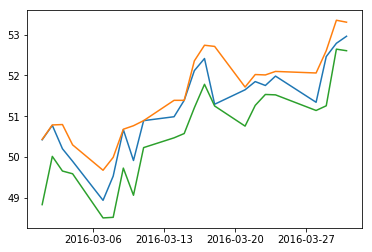

In [28]:
#plot the adjusted closing price of the data set
plt.plot(MSFT_data[['Adj. Close', 'Adj. High', 'Adj. Low']].loc['March 2016'])


The chart above shows the relationship between the stocks high, low and closing price for the one year period of 2016.

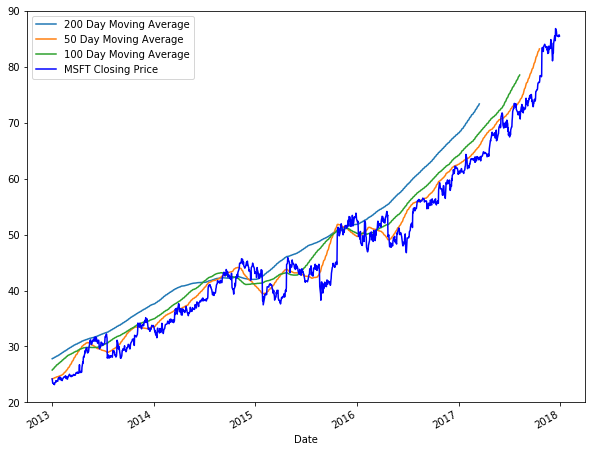

In [81]:
MSFT_data['roll100'] = MSFT_data['Adj. Close'].rolling(100).mean()
MSFT_data['roll200'] = MSFT_data['Adj. Close'].rolling(200).mean()
MSFT_data['roll50'] = MSFT_data['Adj. Close'].rolling(50).mean()
MSFT_data['roll10'] = MSFT_data['Adj. Close'].rolling(10).mean()

#plot Microsoft Price along with moving averages

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

MSFT_data['roll200'].plot(label = '200 Day Moving Average')
MSFT_data['roll50'].plot(label = '50 Day Moving Average')
MSFT_data['roll100'].plot(label = '100 Day Moving Average')
MSFT_data['Adj. Close'].plot(label = 'MSFT Closing Price', color = 'blue')
plt.legend(loc = 'upper left')

The above visualization shows the closing price of Microsoft stock from 2013 through 2018.  It also includes the 50, 100 and 200 day moving averages.  These averages are often used in technical analysis to find patterns in stocks.  In particular when moving averages cross it often indicates a change in the current trend.

In [84]:
MSFT_data['roll10'].head(11)

Date
2017-12-29       NaN
2017-12-28       NaN
2017-12-27       NaN
2017-12-26       NaN
2017-12-22       NaN
2017-12-21       NaN
2017-12-20       NaN
2017-12-19       NaN
2017-12-18       NaN
2017-12-15    85.796
2017-12-14    85.711
Name: roll10, dtype: float64

As can be seen above there is a problem with the way the moving average is being calculated.  The gaps in the averages on the right indicate that the moving averages are being calculated from right to left, or from most recent date to least recent, the opposite of how they should be.  Some experimentation led me to believe that it had something to do with the way the data frame was indexed.

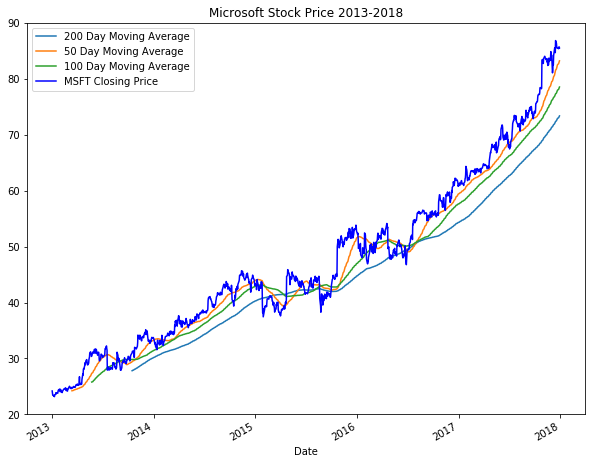

In [29]:
MSFT1 = MSFT_data.sort_index(ascending = True)
MSFT1 = MSFT1.reset_index()
MSFT1 = MSFT1.set_index('Date')

#calculate moving averages for microsoft

MSFT1['roll100'] = MSFT1['Adj. Close'].rolling(100).mean()
MSFT1['roll200'] = MSFT1['Adj. Close'].rolling(200).mean()
MSFT1['roll50'] = MSFT1['Adj. Close'].rolling(50).mean()
MSFT1['roll10'] = MSFT1['Adj. Close'].rolling(10).mean()

#plot Microsoft Price along with moving averages

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)

MSFT1['roll200'].plot(label = '200 Day Moving Average')
MSFT1['roll50'].plot(label = '50 Day Moving Average')
MSFT1['roll100'].plot(label = '100 Day Moving Average')
MSFT1['Adj. Close'].plot(label = 'MSFT Closing Price', color = 'blue')
plt.title('Microsoft Stock Price 2013-2018')
plt.legend(loc = 'upper left')

After resetting the index, resorting the dates, and indexing back to the Date column, the problem appeared to be solved, and the moving averages are calculating correctly.

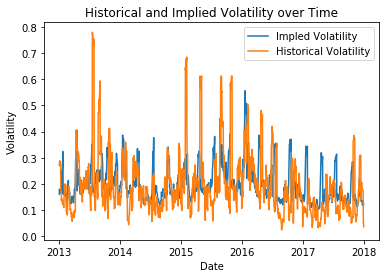

In [46]:
# take a look at 10 day historical volatility compared to implied volatility
plt.plot(MSFT_data['IvMean10'], label = 'Impled Volatility')
plt.plot(MSFT_data['Hv10'], label = 'Historical Volatility')
plt.xlabel('Date')
plt.ylabel("Volatility")
plt.title('Historical and Implied Volatility over Time')
plt.legend(loc = 'upper right')

It's difficult to get a real indication of how implied volatility tracks actual historical volatility, it should be easier to observe on a smaller slice of data.

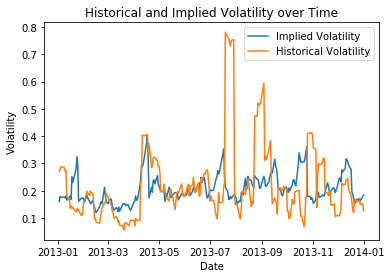

In [30]:
year1= MSFT_data['Dec-31-2013': 'Jan-01-2013']
plt.plot(year1['IvMean10'], label = 'Implied Volatility')
plt.plot(year1['Hv10'], label = 'Historical Volatility')
plt.xlabel('Date')
plt.ylabel("Volatility")
plt.title('Historical and Implied Volatility over Time')
plt.legend(loc = 'upper right')

This chart shows a much clearer picture.  In general implied volatility seems to be at a premium to historical volatility, except in cases where there are large spike in the historical volatility of the stock.

In [34]:
adj = pd.DataFrame(MSFT_data)
adj = adj[['Adj. Close']]


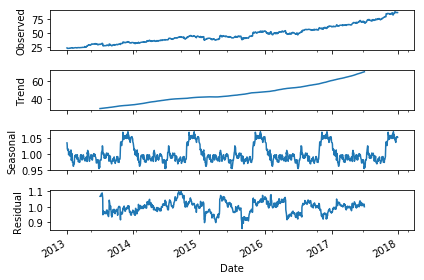

In [51]:
# decompose data for seasonality and trends
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(adj, model='multiplicative', freq = 252)
result.plot()
plt.show()

The decompose above pulled some interesting information from the data.  In addition to the obvious upward trend in Microsoft stock, it also picked up a seasonal pattern where the stock tended to move lower in the summer and then rally towards the end of the year.

In [133]:

plt.rc('figure', figsize = (10, 5))

C:\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



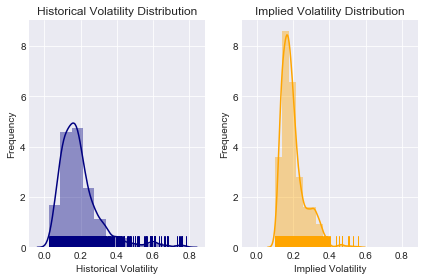

In [32]:
import seaborn as sns
fig = plt.figure()

sns.set_style("darkgrid")

ax1 = fig.add_subplot (1,2,1)

sns.distplot(MSFT1['Hv10'], kde = True, rug = True, color = 'navy', bins = 12)
ax1.set_title('Historical Volatility Distribution')
ax1.set_xlabel('Historical Volatility')
ax1.set_ylabel('Frequency')

ax2 = fig.add_subplot (1,2,2, sharey = ax1, sharex = ax1)

sns.distplot(MSFT1['IvMean10'], kde = True, rug = True, color = 'orange', bins = 12)
ax2.set_title('Implied Volatility Distribution')
ax2.set_xlabel('Implied Volatility')
ax2.set_ylabel('Frequency')

plt.tight_layout()

Looking at the distribution of both historical and implied volatility side by side it can again be seen that while implied option volatility generall tracks historical volatility, the historical volatility shows more large moves or "tail events" while the implied volatility distributions generate a steeper tail.  

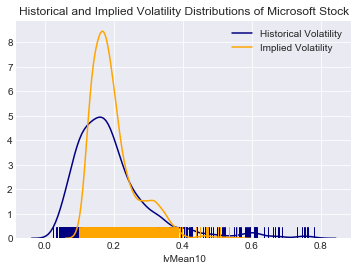

In [33]:
sns.distplot(MSFT1['Hv10'], label = "Historical Volatility", hist = False, rug = True, color = 'navy', bins = 12)
sns.distplot(MSFT1['IvMean10'], label = "Implied Volatility", hist = False, rug = True, color = 'orange', bins = 12)
plt.legend()
plt.title('Historical and Implied Volatility Distributions of Microsoft Stock')
plt.show()

When the distributions are plotted on top of one another it becomes obvious that the historical volatility is often lower than the implied volatility.  One way to conceptualize this is to think of an option as an insurance policy. The implied volatility is equivalent to an insurance premium and generally should be higher than the likeliehood of an event (in this case a large move in the stock price).

These data visualizations help to illuminate several things about Microsoft stock.  It helped to identify both trends and seasonal patterns within the underlying stock.  It also provided a good deal of insight as to the relationship of historical volatility to implied volatility of Microsoft options.  Going forward it will be interesting to further explore the relationship of implied volatility to these other factors.